<a href="https://colab.research.google.com/github/A01741304/Machine-Learning-for-Kids-en-Python/blob/main/Ejercicio_%E2%80%9CAsistente_Virtual%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hola soy tu asistente virtual
¿Qué me quieres decir?capibara
Disculpa, no entendí bien lo que me quisiste decir
¿Qué me quieres decir?adios


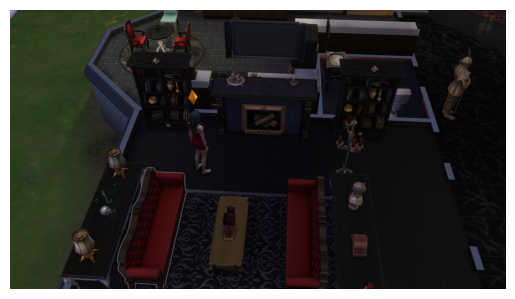

Okay, ¡que tengas un muy buen día!


In [ ]:
import requests
import matplotlib.pyplot as plt
from PIL import Image

# This function will pass your text to the machine learning model
# and return the top result with the highest confidence
def classify(text):
    key = "12598970-e0cd-11ef-b891-d59b7591c340e9b97085-03c8-4d5b-b967-2eb3f3e8ce6f"
    url = "https://machinelearningforkids.co.uk/api/scratch/"+ key + "/classify"

    response = requests.get(url, params={ "data" : text })

    if response.ok:
        responseData = response.json()
        topMatch = responseData[0]
        return topMatch
    else:
        response.raise_for_status()

fotos = {
    ("apagada","apagados") : "TeleOffFocoOff.png",
    ("apagada", "encendidos") : "TeleOffFocoOn.png",
    ("encendida", "apagados") : "TeleOnFocoOff.png",
    ("encendida", "encendidos") : "TeleOnFocoOn.png"
}

# CHANGE THIS to something you want your machine learning model to classify
print("Hola soy tu asistente virtual")
label = ""
tele = "apagada"
focos = "apagados"
while label != "despedida" or confidence < 50:
  demo = classify(input("¿Qué me quieres decir?"))

  label = demo["class_name"]
  confidence = demo["confidence"]

  if confidence<50:
    print("Disculpa, no entendí bien lo que me quisiste decir")

  elif (label == "encender_tele" and tele == "encendida") or (label == "apagar_tele" and tele == "apagada"):
    print("La tele ya está %s" % tele)
  elif (label == "encender_focos" and focos == "encendidos") or (label == "apagar_focos" and focos == "apagados"):
    print("Los focos ya están %s" % focos)

  else:
    # CHANGE THIS to do something different with the result
    respuestas = {
        "encender_tele" : "Okay, voy a encender la tele",
        "apagar_tele" : "Okay, voy a apagar la tele",
        "encender_focos" : "Okay, voy a encender los focos",
        "apagar_focos" : "Okay, voy a apagar los focos",
        "despedida" : "Okay, ¡que tengas un muy buen día!",
        "preguntar_aparatos" : "En este momento, la tele está %s y los focos están %s" % (tele, focos)
    }

    if label == "encender_tele":
      tele = "encendida"
    elif label == "apagar_tele":
      tele = "apagada"
    elif label == "encender_focos":
      focos = "encendidos"
    elif label == "apagar_focos":
      focos = "apagados"

    img = Image.open(fotos[(tele,focos)])
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    plt.pause(1)

    print(respuestas[label])
    plt.pause(1)